# Exploring the General Social Survey

## MACSS 3000
## Jie Heng

### 1. Load data

In [180]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("gss2012.csv")

### 2. Basic analysis

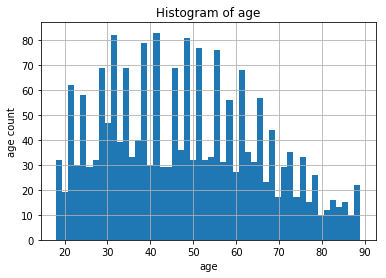

In [181]:
pd.DataFrame.hist(df, column="age", bins = 50)
plt.grid(True)
plt.xlabel('age')
plt.ylabel('age count')
plt.title('Histogram of age')

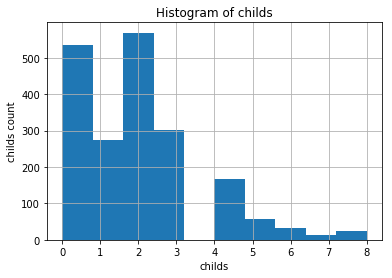

In [182]:
pd.DataFrame.hist(df, column="childs", bins = 10)
plt.grid(True)
plt.xlabel('childs')
plt.ylabel('childs count')
plt.title('Histogram of childs')

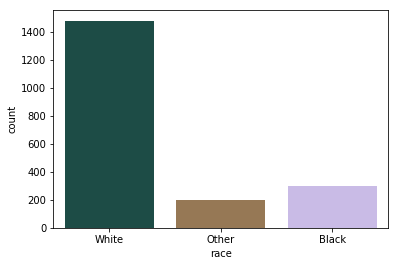

In [183]:
sns.countplot(x="race", data=df, palette="cubehelix") 

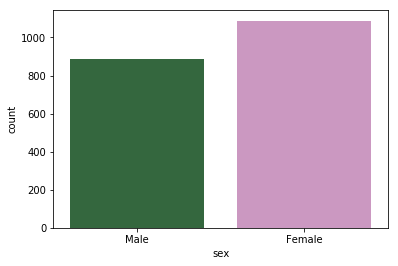

In [184]:
sns.countplot(x="sex", data=df, palette="cubehelix") 

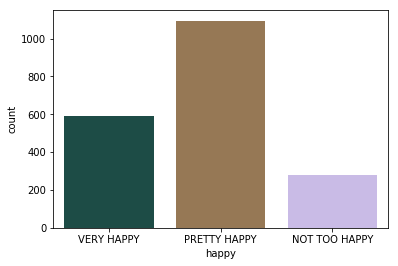

In [185]:
sns.countplot(x="happy", data=df, palette="cubehelix") 

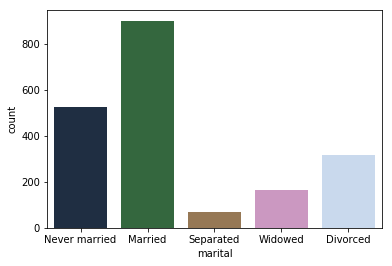

In [186]:
sns.countplot(x="marital", data=df, palette="cubehelix") 

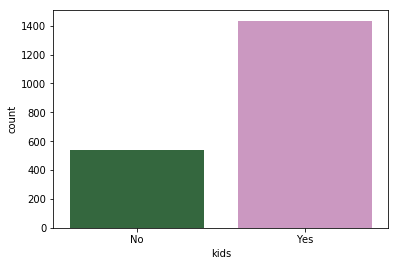

In [187]:
sns.countplot(x="kids", data=df, palette="cubehelix") 

### 3. Happiness and other variables

wrkslf
SELF-EMPLOYED     192
SOMEONE ELSE     1693
dtype: int64


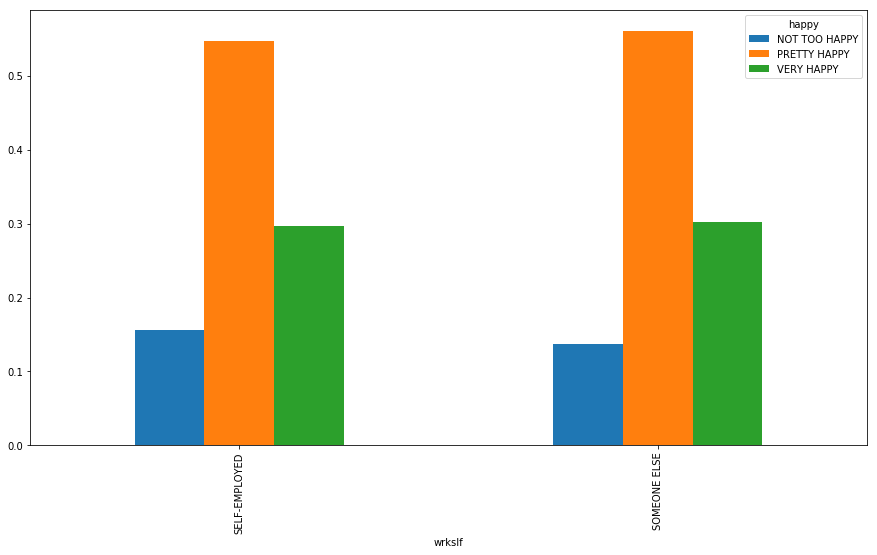

In [188]:
# happiness and employment type
em_mar = df.groupby(by=['wrkslf'])['happy'].value_counts()
em_mar = em_mar.unstack()
print(em_mar.sum(axis = 1))
em_mar.loc['SELF-EMPLOYED'] = em_mar.loc['SELF-EMPLOYED'].div(192)
em_mar.loc['SOMEONE ELSE']  = em_mar.loc['SOMEONE ELSE'].div(1693)
em_mar.plot(kind='bar',figsize=(15, 8))

wrkgvt
GOVERNMENT     368
PRIVATE       1480
dtype: int64


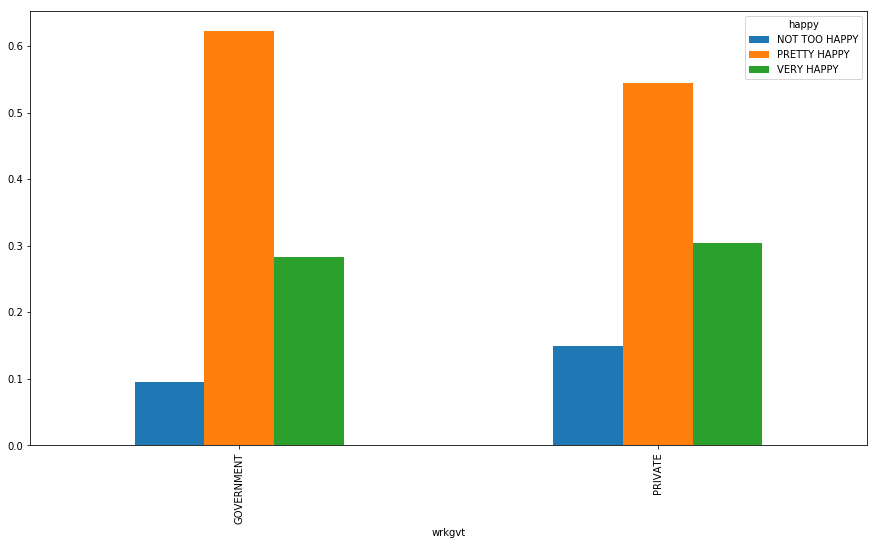

In [189]:
# happiness and work
em_mar = df.groupby(by=['wrkgvt'])['happy'].value_counts()
em_mar = em_mar.unstack()
print(em_mar.sum(axis = 1))
em_mar.loc['GOVERNMENT'] = em_mar.loc['GOVERNMENT'].div(368)
em_mar.loc['PRIVATE']  = em_mar.loc['PRIVATE'].div(1480)
em_mar.plot(kind='bar',figsize=(15, 8))

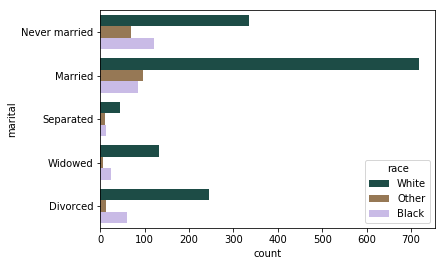

In [190]:
sns.countplot(y="marital", hue="race", data=df, palette="cubehelix") 

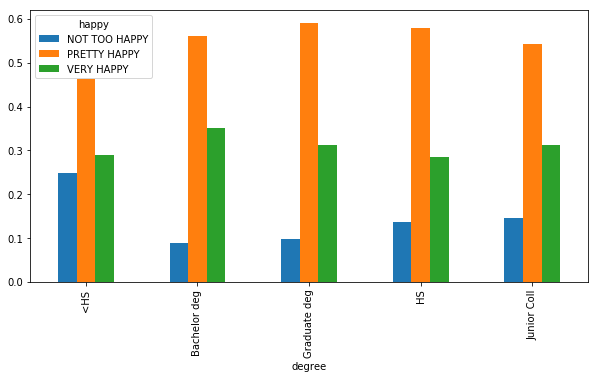

In [191]:
d_mar = df.groupby(by=['degree'])['happy'].value_counts()
d_mar = d_mar.unstack()
a = d_mar.index.tolist()
sumd = d_mar.sum(axis = 1)
for i in a:
    d_mar.loc[i] = d_mar.loc[i].div(sumd[i])

d_mar.plot(kind='bar',figsize=(10, 5))

race
Black     299
Other     196
White    1469
dtype: int64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000015F0B728748>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000015F0BA3BCF8>], dtype=object)

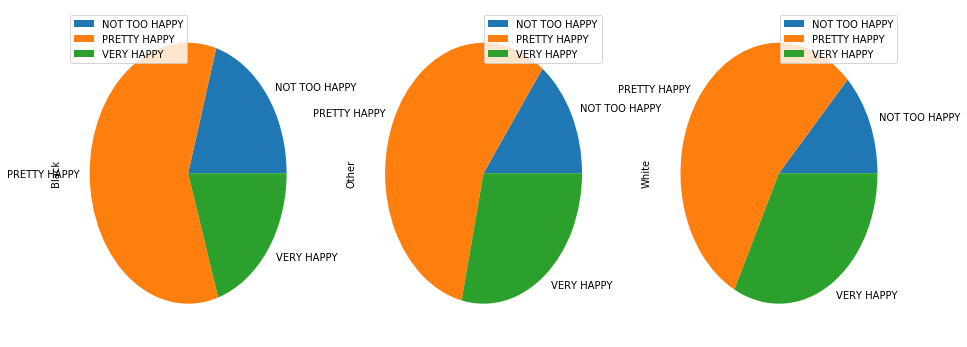

In [192]:
race_mar = df.groupby(by=['race'])['happy'].value_counts()
race_mar = race_mar.unstack()
print(race_mar.sum(axis = 1))
race_mar.loc['White'] = race_mar.loc['White'].div(1469)
race_mar.loc['Black'] = race_mar.loc['Black'].div(299)
race_mar.loc['Other'] = race_mar.loc['Other'].div(196)
race_mar.T.plot.pie(subplots=True, figsize=(15, 6))

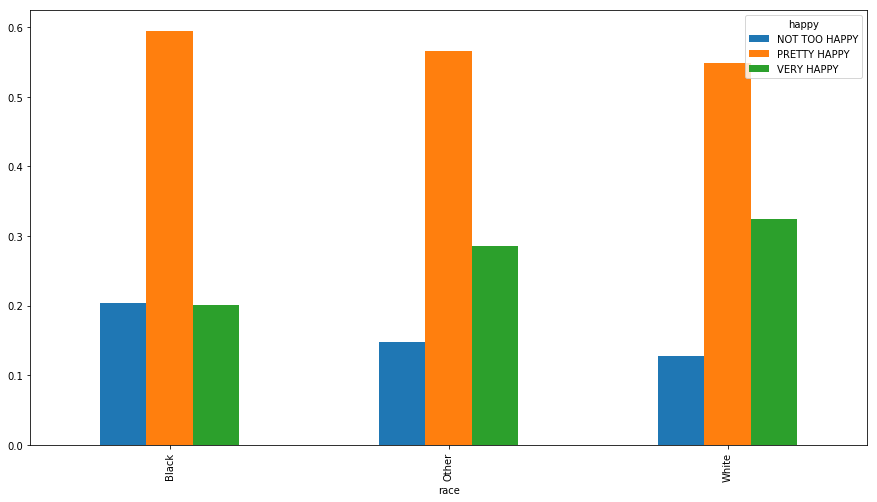

In [193]:
race_mar.plot(kind='bar',figsize=(15, 8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000015F0BA21E48>], dtype=object)

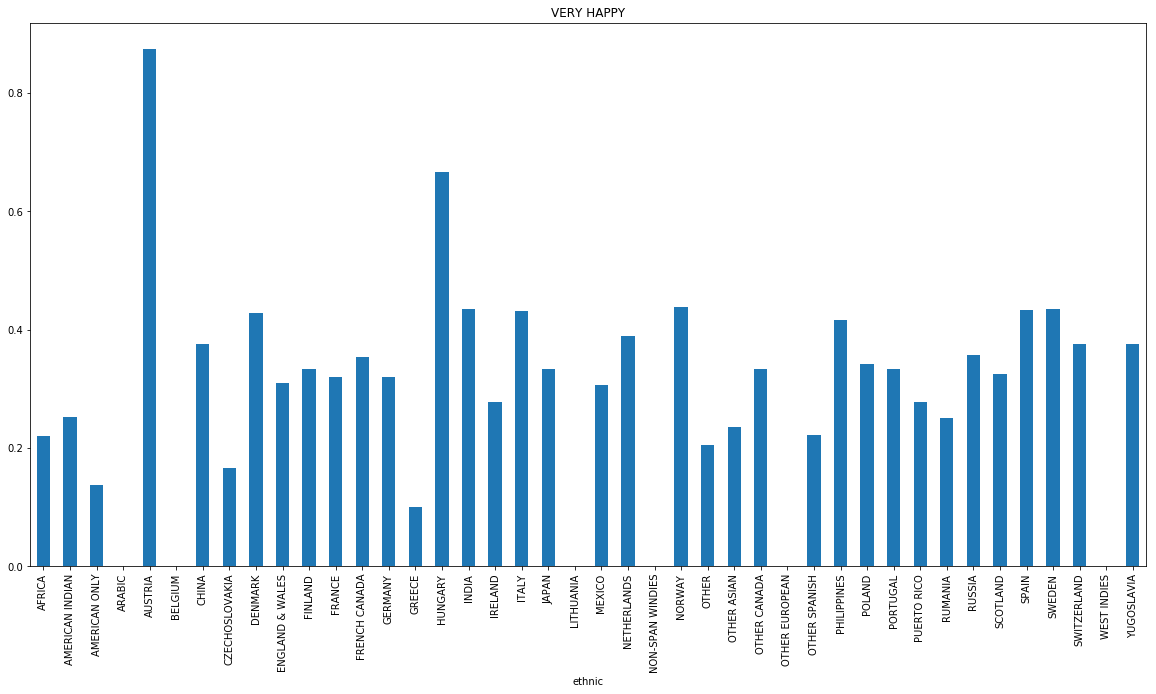

In [194]:
eth_mar = df.groupby(by=['ethnic'])['happy'].value_counts()
eth_mar = eth_mar.unstack()
a = eth_mar.index.tolist()
sumeth = eth_mar.sum(axis = 1)
for i in a:
    eth_mar.loc[i] = eth_mar.loc[i].div(sumeth[i])
married = eth_mar['VERY HAPPY']
married.T.plot.bar(subplots=True, figsize=(20, 10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000015F0BEBBA20>], dtype=object)

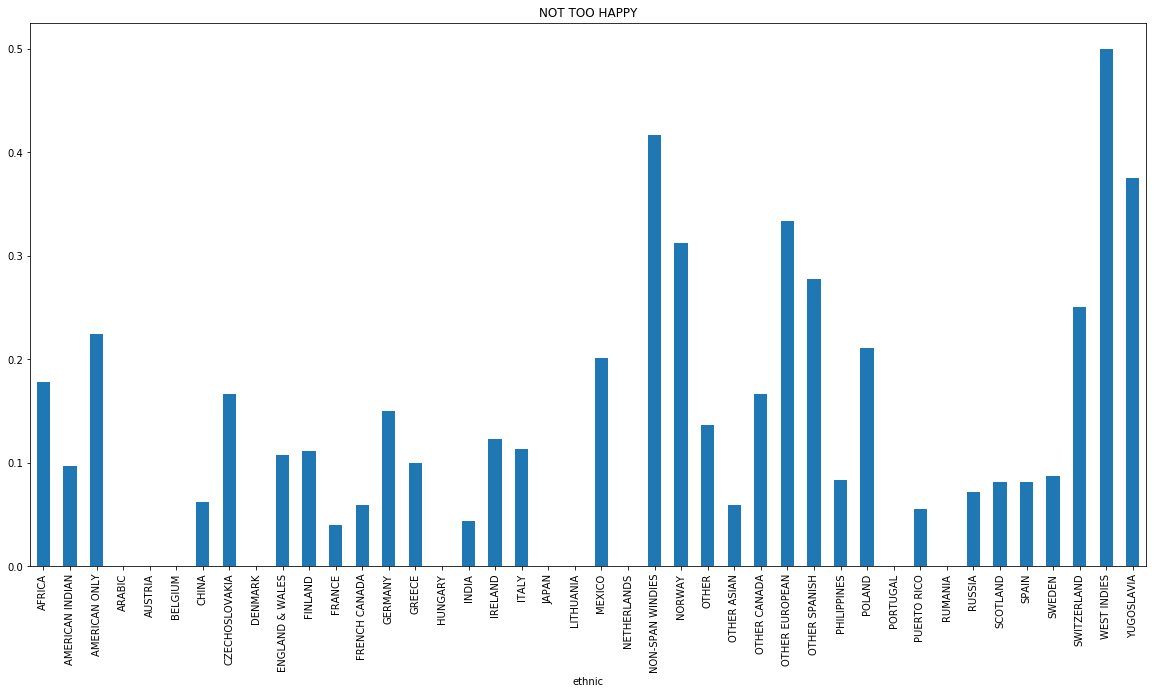

In [195]:
divorce = eth_mar['NOT TOO HAPPY']
divorce.T.plot.bar(subplots=True, figsize=(20, 10))

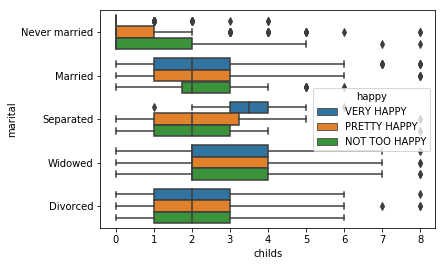

In [196]:
sns.boxplot(x="childs", y="marital", hue="happy", data=df)

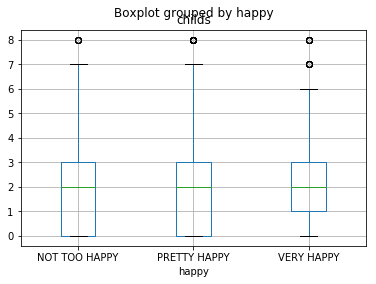

In [197]:
bp = df.boxplot("childs", "happy") 

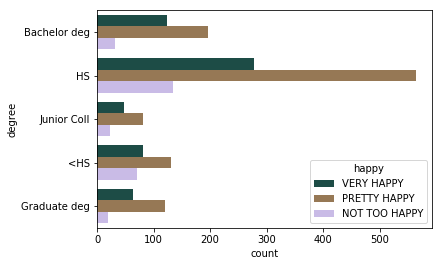

In [198]:
sns.countplot(y="degree", hue="happy", data=df, palette="cubehelix") 

sex
Female    1082
Male       882
dtype: int64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000015F0E324198>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000015F0E38FCC0>], dtype=object)

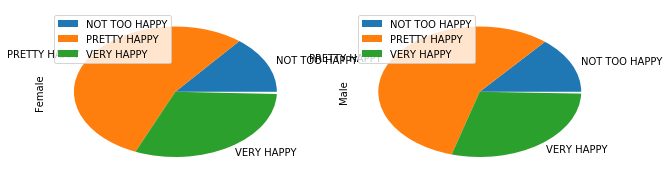

In [199]:
sex_mar = df.groupby(by=['sex'])['happy'].value_counts()
sex_mar = sex_mar.unstack()
print(sex_mar.sum(axis = 1))
sex_mar.loc['Female'] = sex_mar.loc['Female'].div(1088)
sex_mar.loc['Male'] = sex_mar.loc['Male'].div(886)
sex_mar.T.plot.pie(subplots=True, figsize=(10, 3))

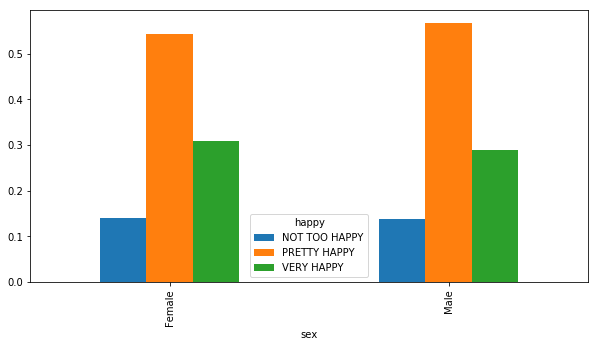

In [200]:
sex_mar.plot(kind='bar',figsize=(10, 5))

sex
Female    1082
Male       882
dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015F0E45D400>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000015F0E6A3160>]], dtype=object)

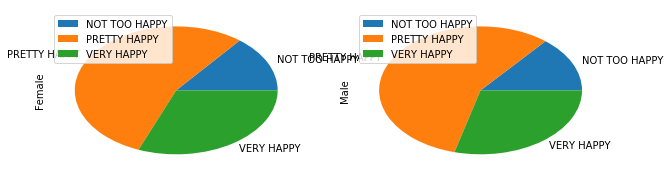

In [201]:
s_mar = df.groupby(by=['sex'])['happy'].value_counts()
s_mar = s_mar.unstack()
print(s_mar.sum(axis = 1))
s_mar.loc['Female'] = s_mar.loc['Female'].div(1082)
s_mar.loc['Male'] = s_mar.loc['Male'].div(882)
s_mar.T.plot.pie(subplots=True, figsize=(10, 10),layout =(3,2))

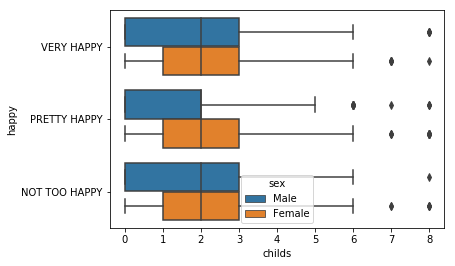

In [202]:
sns.boxplot(x="childs", y="happy", hue="sex", data=df) 

happy          NOT TOO HAPPY  PRETTY HAPPY  VERY HAPPY
marital                                               
Divorced            0.190476      0.606349    0.203175
Married             0.071349      0.510591    0.418060
Never married       0.190476      0.601905    0.207619
Separated           0.363636      0.484848    0.151515
Widowed             0.180124      0.602484    0.217391


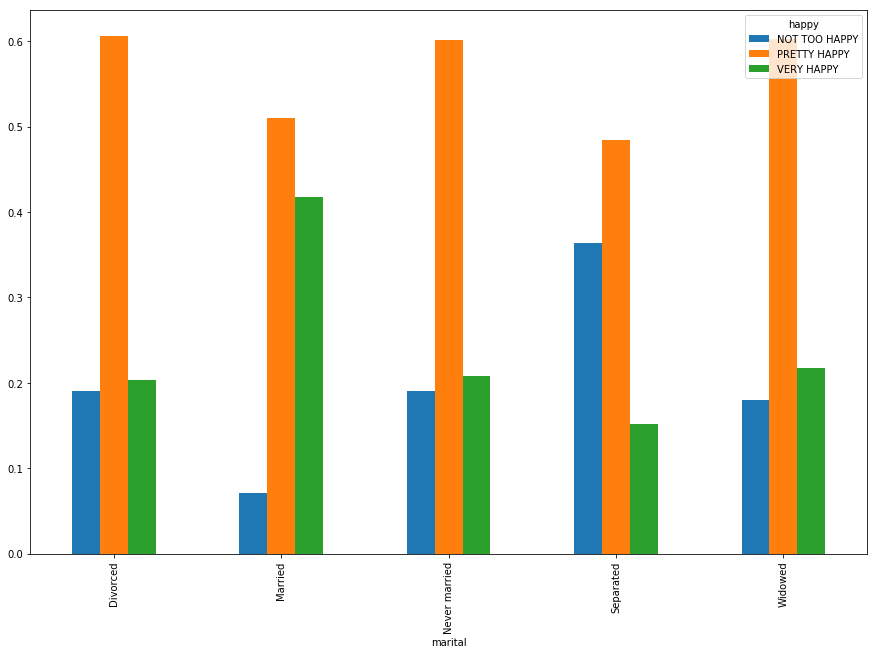

In [203]:
print(hap_mar)
hap_mar.plot(kind='bar',figsize=(15, 10))

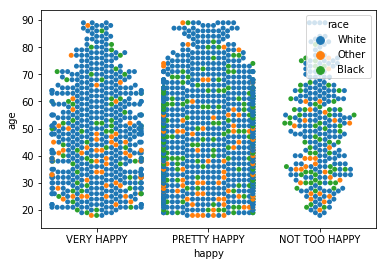

In [204]:
sns.swarmplot(x="happy", y="age", hue="race", data=df)

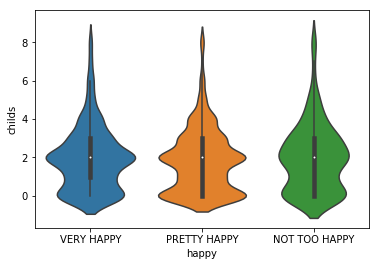

In [205]:
sns.violinplot(x="happy", y="childs", data=df)

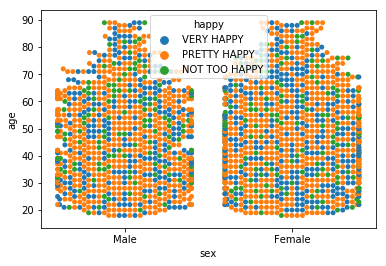

In [206]:
sns.swarmplot(x="sex", y="age", hue="happy", data=df)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000015F096312B0>], dtype=object)

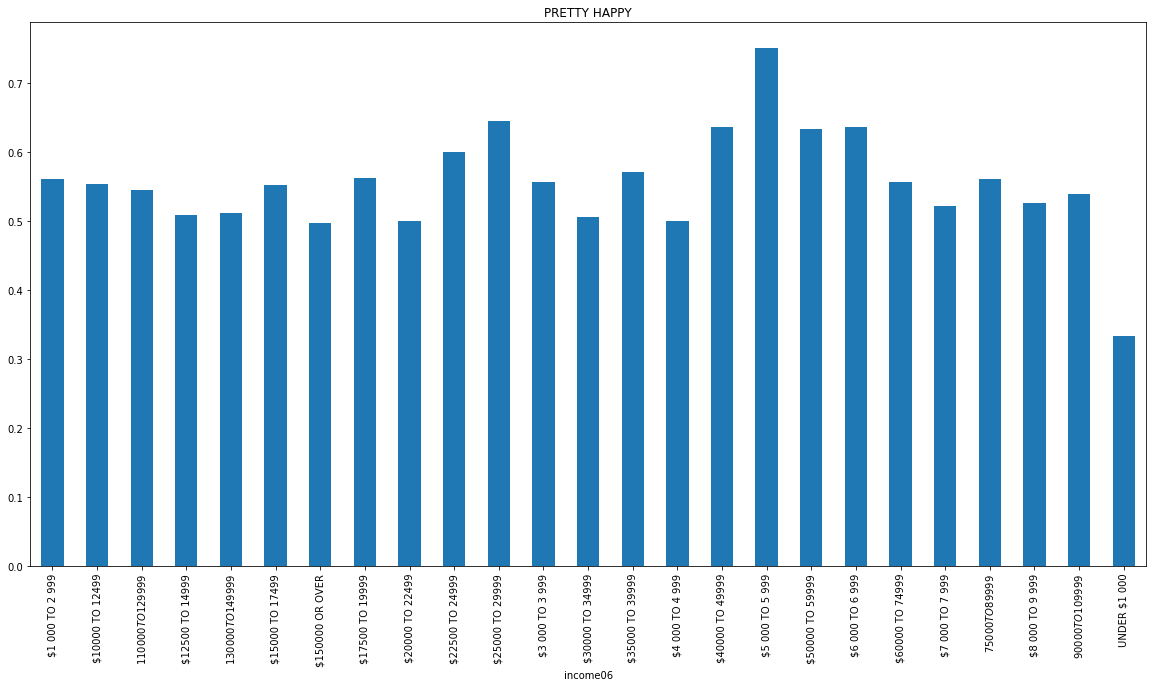

In [207]:
in_mar = df.groupby(by=['income06'])['happy'].value_counts()
in_mar = in_mar.unstack()
in_mar.head()
sumh = in_mar.sum(axis = 1)
a = in_mar.index.tolist()
for i in a:
    in_mar.loc[i] = in_mar.loc[i].div(sumh[i])
p = in_mar['PRETTY HAPPY']
p.T.plot.bar(subplots=True, figsize=(20, 10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000015F0EA7F6A0>], dtype=object)

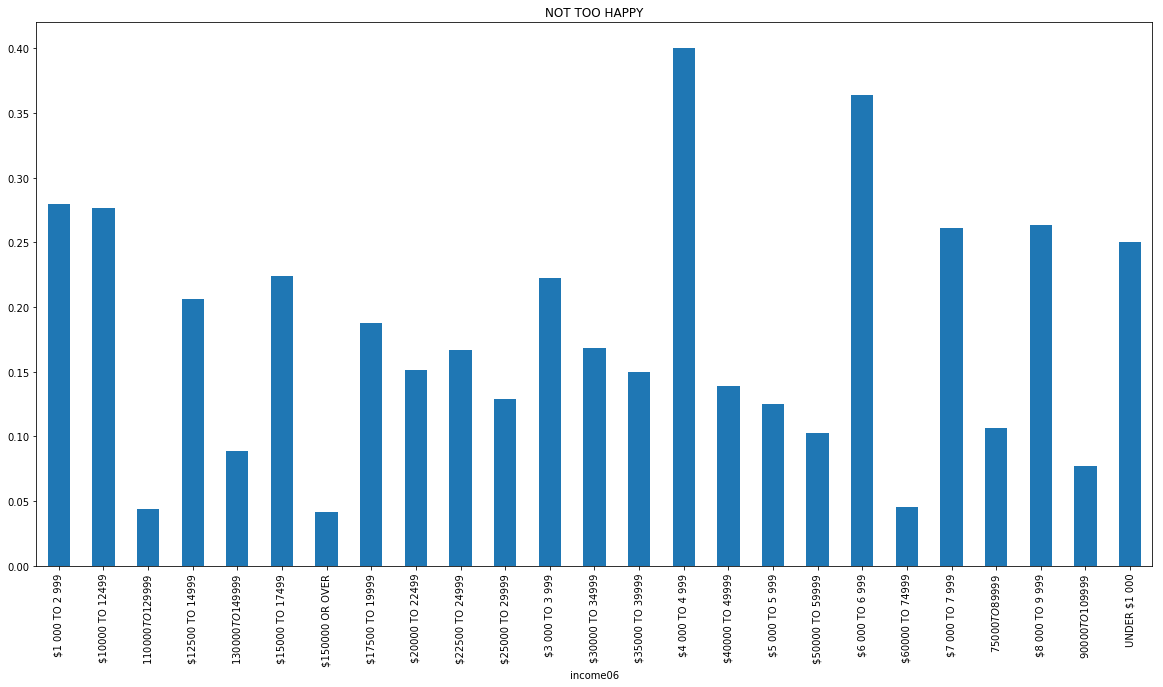

In [208]:
n = in_mar['NOT TOO HAPPY']
n.T.plot.bar(subplots=True, figsize=(20, 10))

In [209]:
def income_code(income):
    if income == 'UNDER $1 000':
        return 1
    if income == '$1 000 TO 2 999':
        return 2
    if income == '$3 000 TO 3 999':
        return 3
    if income == '$4 000 TO 4 999':
        return 4
    if income == '$5 000 TO 5 999':
        return 5
    if income == '$6 000 TO 6 999':
        return 6
    if income == '$7 000 TO 7 999':
        return 7
    if income == '$8 000 TO 9 999':
        return 8
    if income == '$10000 TO 12499':
        return 9
    if income == '$12500 TO 14999':
        return 10
    if income == '$15000 TO 17499':
        return 11
    if income == '$17500 TO 19999':
        return 12
    if income == '$20000 TO 22499':
        return 13
    if income == '$22500 TO 24999':
        return 14
    if income == '$22500 TO 24999':
        return 15
    if income == '$25000 TO 29999':
        return 16
    if income == '$30000 TO 34999':
        return 17
    if income == '$35000 TO 39999':
        return 18
    if income == '$40000 TO 49999':
        return 19
    if income == '$50000 TO 59999':
        return 20
    if income == '$60000 TO 74999':
        return 21
    if income == '$75000 TO 89999':
        return 22
    if income == '$90000 TO 109999':
        return 23
    if income == '$110000 TO 129999':
        return 24
    if income == '$130000 TO 149999':
        return 25
    if income == '$150000 OR OVER':
        return 26
    
df['income06_num'] = df['income06'].apply(income_code)

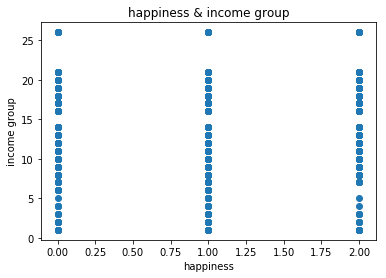

In [210]:
def happy_code(degree):
    if degree == 'NOT TOO HAPPY':
        return 0
    if degree == 'PRETTY HAPPY':
        return 1
    if degree == 'VERY HAPPY':
        return 2
df['happy_num'] = df['happy'].apply(happy_code)
plt.scatter(x=df['happy_num'], y=df['income06_num'])
plt.title("happiness & income group")
plt.xlabel("happiness")
plt.ylabel("income group")
plt.show()

### 4.Marital and other variables 

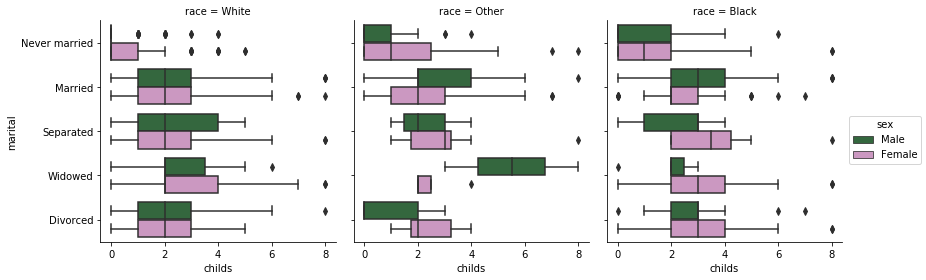

In [211]:
sns.factorplot(x="childs", y="marital", hue="sex", col="race", data=df, kind="box", palette="cubehelix")

marital
Divorced         315
Married          897
Never married    525
Separated         66
Widowed          161
dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015F110A8780>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000015F11235208>]], dtype=object)

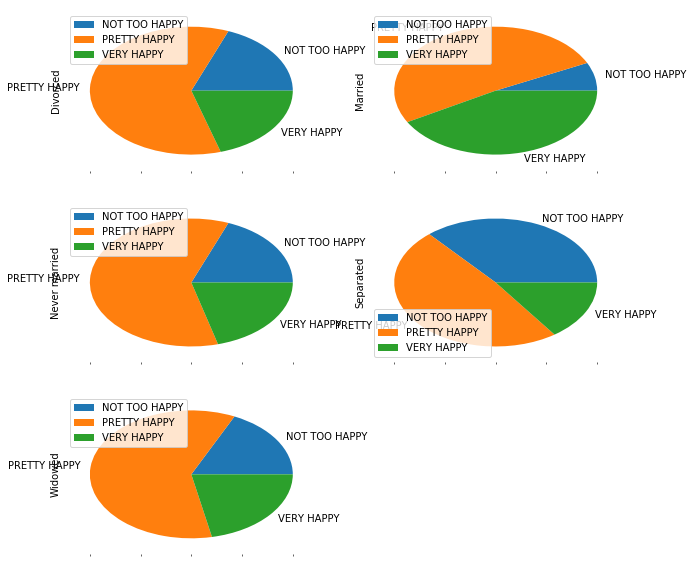

In [212]:
hap_mar = df.groupby(by=['marital'])['happy'].value_counts()
hap_mar = hap_mar.unstack()
print(hap_mar.sum(axis = 1))
hap_mar.loc['Divorced'] = hap_mar.loc['Divorced'].div(315)
hap_mar.loc['Married'] = hap_mar.loc['Married'].div(897)
hap_mar.loc['Never married'] = hap_mar.loc['Never married'].div(525)
hap_mar.loc['Separated'] = hap_mar.loc['Separated'].div(66)
hap_mar.loc['Widowed'] = hap_mar.loc['Widowed'].div(161)
hap_mar.T.plot.pie(subplots=True, figsize=(10, 10),layout =(3,2))

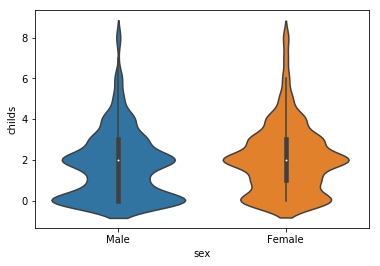

In [213]:
sns.violinplot(x="sex", y="childs", data=df)

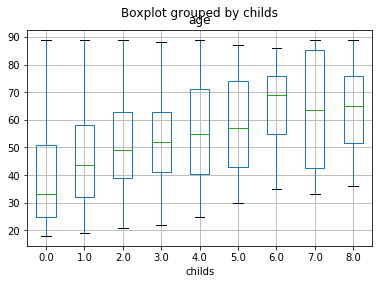

In [214]:
bp = df.boxplot("age",'childs')

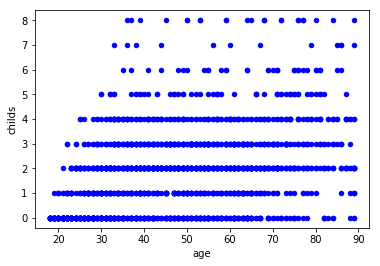

In [215]:
df.plot.scatter('age', 'childs', color ="Blue") 

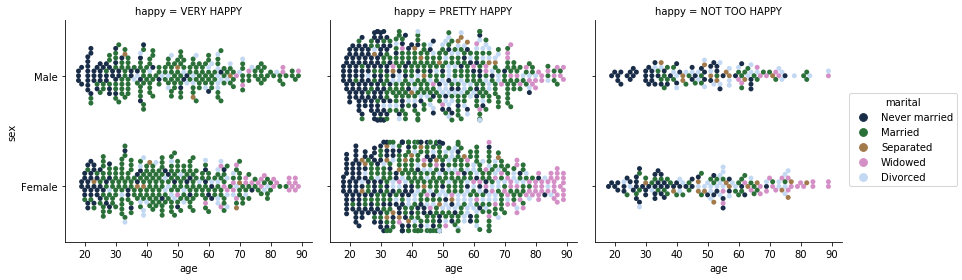

In [216]:
sns.factorplot(x="age", y="sex", hue="marital", col="happy", data=df, kind="swarm", palette='cubehelix')

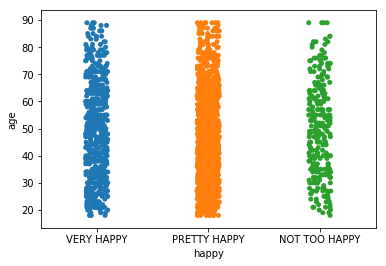

In [217]:
sns.stripplot(x = "happy", y = "age", data = df, jitter = True)